# Missing value #1 (Fill some data)

## 1. Detect the missing value

In [1]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='missing')

In [3]:
df.head()

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0


In [4]:
df

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0
5,M,165.0
6,M,169.0
7,F,155.0
8,M,163.0
9,M,166.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     31 non-null     object 
 1   Height  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [6]:
df.isna().sum()

Sex       0
Height    2
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,Sex,Height
21,M,NaN
28,F,NaN


<AxesSubplot: >

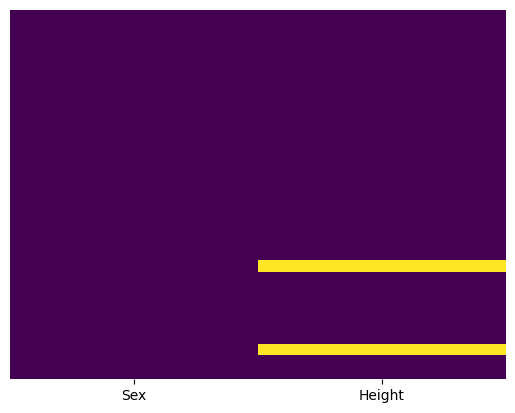

In [8]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 2. Fill the N/A value with mean

In [9]:
df_fill_with_mean = df.copy()

In [10]:
df_fill_with_mean[df_fill_with_mean.isna().any(axis=1)]

,Sex,Height
21,M,NaN
28,F,NaN


In [11]:
avg_height = df_fill_with_mean['Height'].mean()

In [12]:
avg_height

162.13793103448276

In [13]:
df_fill_with_mean['Height'] = df_fill_with_mean['Height'].fillna(avg_height)

In [14]:
df_fill_with_mean.isna().sum()

Sex       0
Height    0
dtype: int64

In [15]:
df_fill_with_mean.iloc[[21,28]]

,Sex,Height
21,M,162.137931
28,F,162.137931


In [16]:
df_fill_with_mean[df.isna().any(axis=1)]

,Sex,Height
21,M,162.137931
28,F,162.137931


##  3. Filling the N/A value with mean of each group

In [17]:
df_fill_with_mean_of_group = df.copy()

<AxesSubplot: xlabel='Sex', ylabel='Height'>

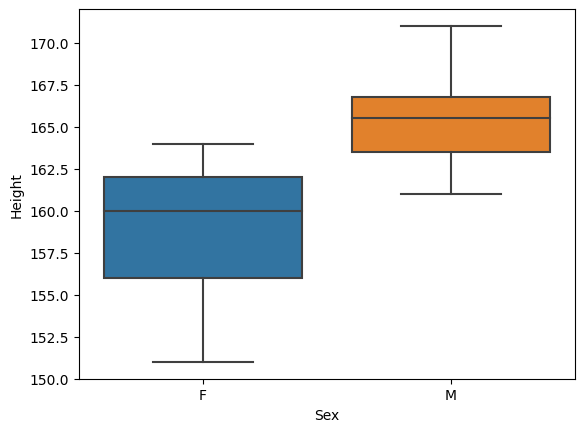

In [18]:
sns.boxplot(x='Sex',y='Height',data=df_fill_with_mean_of_group)

In [19]:
M = df_fill_with_mean_of_group.loc[df_fill_with_mean_of_group['Sex']=='M']
F = df_fill_with_mean_of_group.loc[df_fill_with_mean_of_group['Sex']=='F']

In [20]:
M.mean()

/var/folders/6m/g_y93z555psgg2jtr8y7rn5h0000gr/T/ipykernel_44211/3049135688.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  M.mean()


Height    165.571429
dtype: float64

In [21]:
F.mean()

/var/folders/6m/g_y93z555psgg2jtr8y7rn5h0000gr/T/ipykernel_44211/1563806353.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  F.mean()


Height    158.933333
dtype: float64

In [22]:
import numpy as np
avg_M = np.average(M['Height'].dropna())
avg_F = np.average(F['Height'].dropna())

In [23]:
avg_F

158.93333333333334

In [24]:
def replace_height(x):
    sex = x[0]
    h = x[1]
    if pd.isnull(h):
        if sex == 'M':
            return avg_M
        elif sex == 'F':
            return avg_F
    else:
        return h

In [25]:
df_fill_with_mean_of_group['Height'] = df_fill_with_mean_of_group[['Sex','Height']].apply(replace_height,axis=1)

In [26]:
df_fill_with_mean_of_group.isna().sum()

Sex       0
Height    0
dtype: int64

In [54]:
df_fill_with_mean_of_group[df.isna().any(axis=1)]

,Sex,Height
21,M,165.571429
28,F,158.933333


## 4. Filling the N/A value with scikid learn

In [59]:
df_sklearn = df.copy()
df_sklearn

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0
5,M,165.0
6,M,169.0
7,F,155.0
8,M,163.0
9,M,166.0


In [60]:
from sklearn.impute import SimpleImputer
my_fill_tech = SimpleImputer(strategy = 'mean')
fill_data = my_fill_tech.fit_transform(df_sklearn.drop('Sex',axis=1))

In [62]:
df_sklearn['Height']=pd.DataFrame(fill_data)

In [63]:
df_sklearn.isna().sum()

Sex       0
Height    0
dtype: int64

In [64]:
df_sklearn[df.isna().any(axis=1)]

,Sex,Height
21,M,162.137931
28,F,162.137931


## 5. Filling the N/A value for caterical data

In [65]:
df = pd.read_excel('dataset.xlsx', sheet_name='missing2')
df

,Sex,Height
0,F,162
1,NaN,162
2,F,163
3,M,165
4,M,167
5,M,165
6,M,169
7,F,155
8,NaN,163
9,M,166


In [66]:
df_category = df.copy()

In [67]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     29 non-null     object
 1   Height  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [68]:
df_category.isna().sum()

Sex       2
Height    0
dtype: int64

In [69]:
df_category[df_category.isna().any(axis=1)]

,Sex,Height
1,NaN,162
8,NaN,163


<AxesSubplot: >

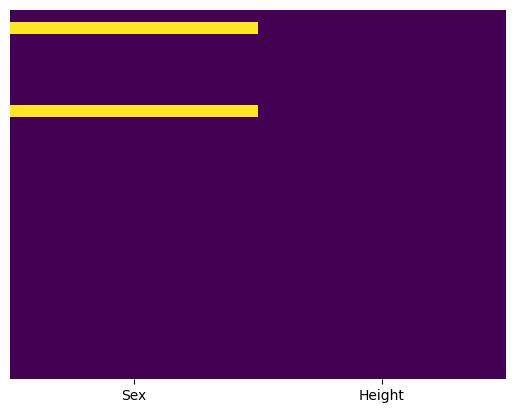

In [70]:
sns.heatmap(df_category.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
len(df[df['Sex']=='F'])

16

In [72]:
len(df[df['Sex']=='M'])

13

In [74]:
from sklearn.impute import SimpleImputer
my_fill_tech = SimpleImputer(strategy = 'most_frequent')
fill_data = my_fill_tech.fit_transform(df_category.drop('Height',axis=1))

In [75]:
df_category['Sex']=pd.DataFrame(fill_data)

In [76]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     31 non-null     object
 1   Height  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [77]:
df_category[df.isna().any(axis=1)]

,Sex,Height
1,F,162
8,F,163


# Missing value #2 (Fill nothing)

## 1. Mark N/A value with additional column

In [78]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='missing')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     31 non-null     object 
 1   Height  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [80]:
df_add_col = df.copy()
df_add_col['mark'] = df_add_col['Height'].isnull()

In [81]:
df_add_col

,Sex,Height,mark
0,F,162.0,False
1,M,162.0,False
2,F,163.0,False
3,M,165.0,False
4,M,167.0,False
5,M,165.0,False
6,M,169.0,False
7,F,155.0,False
8,M,163.0,False
9,M,166.0,False


In [82]:
df

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0
5,M,165.0
6,M,169.0
7,F,155.0
8,M,163.0
9,M,166.0


## 2. Delete the row with N/A value

In [83]:
df_del = df.copy()

In [84]:
df_del = df_del.dropna(axis=0)

In [85]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     29 non-null     object 
 1   Height  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 696.0+ bytes


In [86]:
df_del

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0
5,M,165.0
6,M,169.0
7,F,155.0
8,M,163.0
9,M,166.0
